In [3]:
import pandas as pd
import seaborn as sns
import json

In [14]:
scores = json.load(open('../data/alignment_scores/song_scores-28-01-2022-01-14-25.json'))

/media/manu/Data/PycharmProjects/thesis/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

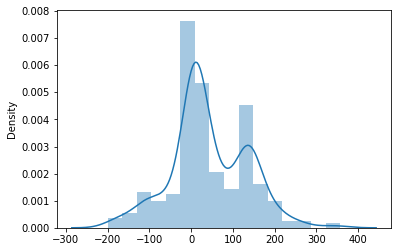

In [104]:
sns.distplot([s['candidate'] for s in scores.values()])

In [17]:
for s in scores.values():
    if 'max_score' not in s:
        print(s)

In [29]:
df = pd.DataFrame(scores).T

In [30]:
df

,all_scores,candidate_rank,candidate,mean_score,max_score,outlier_score_1,outlier_score_2,outlier_score_3
Doug McKenzie/I Thought About You.mid,"[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...",1,19,0.459038,0.553942,0.005418,0.012191,0.012418
Doug McKenzie/Alice In Wonderland.mid,"[0.5071428571428572, 0.5142063492063492, 0.515...",1,0,0.475052,0.598823,0.001225,0.002757,0.003947
Doug McKenzie/Autumn Leaves.mid,"[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...",1,4,0.481087,0.64016,0.006399,0.014398,0.021286
Doug McKenzie/But Beautiful.mid,"[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...",1,177,0.483932,0.566541,0.009366,0.021073,0.024289
Doug McKenzie/Come Rain Or Come Shine (1).mid,"[0.5, 0.5, 0.5, 0.5, 0.5, 0.49609375, 0.492187...",1,-1,0.433889,0.571057,0.003632,0.008172,0.008705
...,...,...,...,...,...,...,...,...
Weimar DB/Wayne Shorter - Speak No Evil.mid,"[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...",1,149,0.453985,0.544167,0.002993,0.006733,0.00924
Weimar DB/Woody Shaw - Imagination.mid,"[0.49631959475709475, 0.4960881132756133, 0.49...",1,8,0.480371,0.557373,0.001673,0.003764,0.008391
Weimar DB/Zoot Sims - All The Things You Are.mid,"[0.4895833333333333, 0.4895833333333333, 0.5, ...",1,17,0.424402,0.646991,0.008743,0.019671,0.019805
Weimar DB/Zoot Sims - Night And Day (1).mid,"[0.5104166666666666, 0.5130208333333334, 0.513...",1,19,0.483673,0.606771,0.006232,0.014021,0.022697


In [64]:
# # k-means clustering
# from numpy import unique
# from numpy import where
# from sklearn.cluster import KMeans
# from matplotlib import pyplot as plt

# X = df[['candidate', 'mean_score', 'max_score', 'outlier_score_1']]

# kmeans = KMeans(n_clusters=4)
# kmeans.fit(X)
# y_kmeans = kmeans.predict(X)

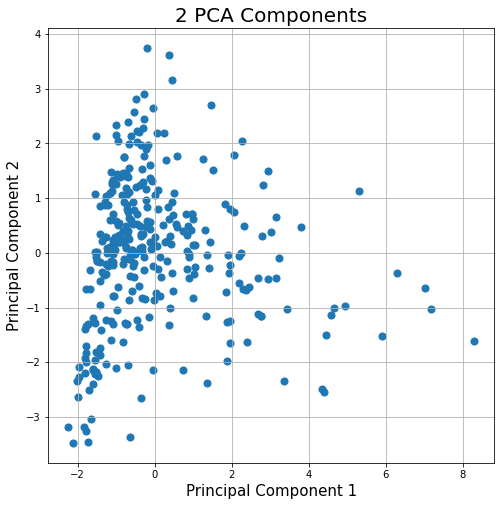

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline


X = df[['candidate', 'mean_score', 'max_score', 'outlier_score_1', 'outlier_score_2', 'outlier_score_3']]

#Apply Standard Scaling
sc=StandardScaler()  
X=sc.fit_transform(X) 

#Define two components  
pca=PCA(n_components=2) 
principalComponents=pca.fit_transform(X) 
principalDf=pd.DataFrame(data=principalComponents,columns=['principal component 1','principal component 2']) 
principalDf.head()

finalDf=principalDf
finalDf.head()

fig=plt.figure(figsize=(8,8))  
ax=fig.add_subplot(1,1,1)  
ax.set_xlabel('Principal Component 1',fontsize = 15)  
ax.set_ylabel('Principal Component 2',fontsize = 15)  
ax.set_title('2 PCA Components',fontsize=20)  
ax.scatter(
    finalDf.loc[:,'principal component 1'],
    finalDf.loc[:,'principal component 2'],
    s=50
)
ax.grid()

/media/manu/Data/PycharmProjects/thesis/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

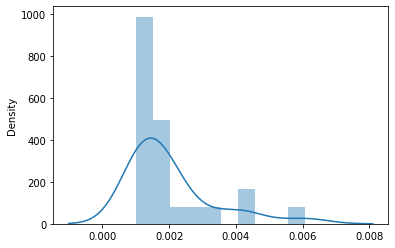

In [102]:
diffs = []
for n, s in scores.items():
#     print(s['all_scores'])
    diff = np.median(s['all_scores']) - np.median(sorted(s['all_scores'])[:-2])

    if diff > 0.001:
        diffs.append(diff)
    
# print(diffs)
    
sns.distplot(diffs)

In [106]:
w = [1,3,8,1,2,1,9,2,1]

In [154]:
ws = [z* (len(w)/(i+1)) for i,z in enumerate(w)]

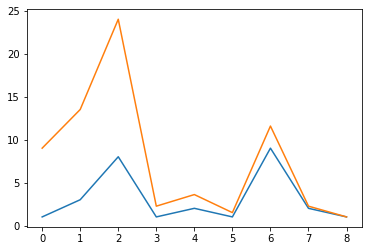

In [157]:
plt.plot(w)
plt.plot(ws)

In [412]:
s =  [
    0.4534183673469388,
    0.4661734693877551,
    0.4763775510204082,
    0.48403061224489796,
    0.4874489795918367,
    0.45515306122448984,
    0.4245408163265307,
    0.4143367346938776,
    0.4262244897959183,
    0.41602040816326524,
    0.4245408163265307,
    0.43561224489795924,
    0.42882653061224496,
    0.46454081632653066,
    0.45346938775510204,
    0.4602551020408164,
    0.4925510204081633,
    0.46959183673469385,
    0.48489795918367345,
    0.48234693877551016,
    0.4781122448979592,
    0.48918367346938774,
    0.4560204081632653,
    0.46367346938775506,
    0.43561224489795924,
    0.4381632653061225,
    0.44071428571428567,
    0.40244897959183673,
    0.3973469387755102,
    0.35821428571428576,
    0.360765306122449,
    0.3811734693877551,
    0.4007142857142857,
    0.42790816326530606,
    0.41260204081632657,
    0.4100510204081632,
    0.445765306122449,
    0.45683673469387753,
    0.4568367346938776,
    0.46959183673469385,
    0.4644897959183673,
    0.451734693877551,
    0.44239795918367353,
    0.43561224489795913,
    0.4058673469387756,
    0.3837755102040817,
    0.39653061224489794,
    0.40418367346938777,
    0.4194897959183673,
    0.43392857142857144,
    0.42882653061224496,
    0.42795918367346936,
    0.4177551020408163,
    0.38290816326530613,
    0.37525510204081636,
    0.3914285714285714,
    0.4016326530612245,
    0.4220408163265306,
    0.47561224489795917,
    0.4552040816326531,
    0.4322448979591837,
    0.4492346938775511,
    0.4254081632653061,
    0.4254081632653061,
    0.4245408163265307,
    0.43897959183673463,
    0.43897959183673463,
    0.45428571428571424,
    0.46704081632653055,
    0.4415306122448979,
    0.42964285714285716,
    0.4254081632653061,
    0.43647959183673474,
    0.47051020408163263,
    0.48326530612244906,
    0.46709183673469395,
    0.4721938775510205,
    0.4696428571428572,
    0.42714285714285716,
    0.43311224489795924,
    0.43056122448979595,
    0.3973979591836735,
    0.4194897959183673,
    0.4084183673469388,
    0.38545918367346943,
    0.39311224489795926,
    0.41183673469387755,
    0.43566326530612254,
    0.4560714285714286,
    0.4560714285714286,
    0.4382142857142858,
    0.4382142857142858,
    0.46117346938775516,
    0.4679591836734694,
    0.4492346938775511,
    0.44071428571428567,
    0.44750000000000006,
    0.4653571428571429,
    0.48066326530612247,
    0.4653571428571429,
    0.46367346938775506,
    0.4721938775510205,
    0.4552040816326531,
    0.47561224489795917,
    0.49178571428571427,
    0.4688265306122449,
    0.4611734693877551,
    0.4535204081632654,
    0.44673469387755105,
    0.42801020408163265,
    0.43989795918367347,
    0.4466836734693878,
    0.45178571428571435,
    0.46367346938775506,
    0.4628061224489796,
    0.46790816326530615,
    0.46367346938775506,
    0.46622448979591835,
    0.4543367346938776,
    0.4654081632653061,
    0.46372448979591835,
    0.4509693877551021,
    0.4433163265306123,
    0.4382142857142857,
    0.45948979591836736,
    0.45352040816326533,
    0.45010204081632654,
    0.43392857142857144,
    0.4585714285714286,
    0.46622448979591835,
    0.44071428571428567,
    0.4458163265306122,
    0.43137755102040815,
    0.40928571428571425,
    0.4016326530612245,
    0.4143877551020408,
    0.43392857142857144,
    0.44071428571428567,
    0.48750000000000004,
    0.47984693877551027,
    0.4415816326530613,
    0.4534693877551021,
    0.4254081632653061,
    0.43816326530612243,
    0.4577040816326531,
    0.45428571428571424,
    0.45086734693877556,
    0.43556122448979595,
    0.43214285714285716,
    0.41596938775510206,
    0.3955612244897959,
    0.42617346938775513,
    0.43295918367346936,
    0.4448469387755102,
    0.47035714285714286,
    0.41591836734693877,
    0.4099489795918367,
    0.4218367346938775,
    0.4133163265306122,
    0.42010204081632657,
    0.41923469387755097,
    0.413265306122449,
    0.37755102040816324,
    0.3868877551020408,
    0.39964285714285713,
    0.3970918367346939,
    0.4140816326530612,
    0.42428571428571427,
    0.4591326530612245,
    0.44295918367346937,
    0.4438265306122449,
    0.4591326530612245,
    0.41321428571428576,
    0.39448979591836736,
    0.38852040816326533,
    0.38510204081632654,
    0.40464285714285714,
    0.4369387755102041,
    0.43607142857142855,
    0.4411734693877551,
    0.43693877551020416,
    0.41229591836734697,
    0.4250510204081633,
    0.41229591836734697,
    0.43270408163265306,
    0.4276020408163265,
    0.41653061224489796,
    0.42331632653061224,
    0.41566326530612246,
    0.43607142857142867,
    0.4224489795918368,
    0.41903061224489796,
    0.4470918367346939,
    0.4513265306122449,
    0.4453571428571429,
    0.45556122448979586,
    0.43515306122448977,
    0.42836734693877554,
    0.4334693877551021,
    0.41816326530612247,
    0.4147448979591836,
    0.4266326530612245,
    0.42749999999999994,
    0.42071428571428576,
    0.41903061224489796,
    0.41647959183673466,
    0.37821428571428567,
    0.39862244897959187,
    0.41647959183673466,
    0.4062755102040816,
    0.45306122448979597,
    0.4352040816326531,
    0.43862244897959185,
    0.44459183673469393,
    0.40719387755102043,
    0.4131632653061225,
    0.40806122448979604,
    0.4029591836734695,
    0.4344387755102041,
    0.4191326530612245,
    0.40382653061224494,
    0.40127551020408164,
    0.36811224489795924,
    0.37831632653061226,
    0.4080612244897959,
    0.4335714285714286,
    0.4310204081632653,
    0.4412244897959184,
    0.4514285714285714,
    0.4335714285714286,
    0.42933673469387756,
    0.4174489795918368,
    0.41576530612244905,
    0.4310714285714286,
    0.43617346938775514,
    0.42596938775510207,
    0.4064285714285714,
    0.38857142857142857,
    0.3936734693877551,
    0.4140816326530613,
    0.4472448979591837,
    0.44214285714285717,
    0.43872448979591844,
    0.44551020408163267,
    0.42000000000000004,
    0.40045918367346944,
    0.3928061224489796,
    0.3936734693877551,
    0.4038775510204081,
    0.4242857142857143,
    0.4370408163265307,
    0.4140816326530612,
    0.39877551020408164,
    0.39025510204081637,
    0.39193877551020406,
    0.39362244897959187,
    0.4361224489795918,
    0.4488775510204081,
    0.4488775510204081,
    0.4488775510204081,
    0.40806122448979587,
    0.414030612244898,
    0.40214285714285714,
    0.42596938775510207,
    0.43617346938775514,
    0.42428571428571427,
    0.44979591836734695,
    0.4421428571428571,
    0.42596938775510207,
    0.4183163265306123,
    0.42341836734693883,
    0.4183163265306123,
    0.4251020408163266,
    0.4302040816326531,
    0.414030612244898,
    0.4233673469387755,
    0.4403571428571429,
    0.4378061224489796,
    0.4335714285714286,
    0.43188775510204086,
    0.4157142857142858,
    0.4284693877551021,
    0.44377551020408174,
    0.4233673469387756,
    0.42336734693877554,
    0.4020918367346939,
    0.3935714285714286,
    0.40035714285714286,
    0.3892857142857143,
    0.41989795918367345,
    0.4071428571428572,
    0.3943877551020408,
    0.38760204081632654,
    0.3731632653061224,
    0.3833673469387756,
    0.3867857142857143,
    0.44290816326530613,
    0.4760714285714286,
    0.48795918367346947,
    0.4854081632653061,
    0.43948979591836734,
    0.4216326530612245,
    0.40122448979591835,
    0.4054591836734694,
    0.4054591836734694,
    0.42673469387755103,
    0.4445918367346939,
    0.4369387755102041,
    0.43525510204081636,
    0.4080612244897959,
    0.40040816326530615,
    0.42933673469387756,
    0.42423469387755103,
    0.42423469387755103,
    0.4216836734693878,
    0.4063775510204082,
    0.43954081632653064,
    0.4497448979591837,
    0.4539795918367347,
    0.4539795918367347,
    0.43357142857142866,
    0.4191326530612245,
    0.40469387755102043,
    0.4072448979591837,
    0.41576530612244905,
    0.42938775510204086,
    0.4344897959183674,
    0.4532142857142858,
    0.45831632653061233,
    0.4532142857142858,
    0.4489795918367347,
    0.437091836734694,
    0.4328571428571429,
    0.4133163265306122,
    0.39035714285714296,
    0.3971428571428572,
    0.39627551020408164,
    0.419234693877551,
    0.41668367346938767,
    0.40647959183673465,
    0.4456122448979592,
    0.44392857142857145,
    0.43714285714285717,
    0.4456632653061225,
    0.4388775510204082,
    0.4269897959183674,
    0.42785714285714294,
    0.43892857142857145,
    0.45933673469387754,
    0.47551020408163275,
    0.4687244897959184,
    0.45852040816326534,
    0.4534183673469388,
    0.4661734693877551,
    0.4763775510204082,
    0.48403061224489796,
    0.4874489795918367,
    0.45515306122448984,
    0.4245408163265307,
    0.4143367346938776,
    0.4262244897959183,
    0.41602040816326524,
    0.4245408163265307,
    0.43561224489795924,
    0.42882653061224496,
    0.46454081632653066,
    0.45346938775510204,
    0.4602551020408164,
    0.4925510204081633,
    0.46959183673469385,
    0.48489795918367345,
    0.48234693877551016,
    0.4781122448979592,
    0.48918367346938774,
    0.4560204081632653,
    0.46367346938775506,
    0.43561224489795924,
    0.4381632653061225,
    0.44071428571428567,
    0.40244897959183673,
    0.3973469387755102,
    0.35821428571428576,
    0.360765306122449,
    0.3811734693877551,
    0.4007142857142857,
    0.42790816326530606,
    0.41260204081632657,
    0.4100510204081632,
    0.445765306122449,
    0.45683673469387753,
    0.4568367346938776,
    0.46959183673469385,
    0.4644897959183673,
    0.451734693877551,
    0.44239795918367353,
    0.43561224489795913,
    0.4058673469387756,
    0.3837755102040817,
    0.39653061224489794,
    0.40418367346938777,
    0.4194897959183673,
    0.43392857142857144,
    0.42882653061224496,
    0.42795918367346936,
    0.4177551020408163,
    0.38290816326530613,
    0.37525510204081636,
    0.3914285714285714,
    0.4016326530612245,
    0.4220408163265306,
    0.47561224489795917,
    0.4552040816326531,
    0.4322448979591837,
    0.4492346938775511,
    0.4254081632653061,
    0.4254081632653061,
    0.4245408163265307,
    0.43897959183673463,
    0.43897959183673463,
    0.45428571428571424,
    0.46704081632653055,
    0.4415306122448979,
    0.42964285714285716,
    0.4254081632653061,
    0.43647959183673474,
    0.47051020408163263,
    0.48326530612244906,
    0.46709183673469395,
    0.4721938775510205,
    0.4696428571428572,
    0.42714285714285716,
    0.43311224489795924,
    0.43056122448979595,
    0.3973979591836735,
    0.4194897959183673,
    0.4084183673469388,
    0.38545918367346943,
    0.39311224489795926,
    0.41183673469387755,
    0.43566326530612254,
    0.4560714285714286,
    0.4560714285714286,
    0.4382142857142858,
    0.4382142857142858,
    0.46117346938775516,
    0.4679591836734694,
    0.4492346938775511,
    0.44071428571428567,
    0.44750000000000006,
    0.4653571428571429,
    0.48066326530612247,
    0.4653571428571429,
    0.46367346938775506,
    0.4721938775510205,
    0.4552040816326531,
    0.47561224489795917,
    0.49178571428571427,
    0.4688265306122449,
    0.4611734693877551,
    0.4535204081632654,
    0.44673469387755105,
    0.42801020408163265,
    0.43989795918367347,
    0.4466836734693878,
    0.45178571428571435,
    0.46367346938775506,
    0.4628061224489796,
    0.46790816326530615,
    0.46367346938775506,
    0.46622448979591835,
    0.4543367346938776,
    0.4654081632653061,
    0.46372448979591835,
    0.4509693877551021,
    0.4433163265306123,
    0.4382142857142857,
    0.45948979591836736,
    0.45352040816326533,
    0.45010204081632654,
    0.43392857142857144,
    0.4585714285714286,
    0.46622448979591835,
    0.44071428571428567,
    0.4458163265306122,
    0.43137755102040815,
    0.40928571428571425,
    0.4016326530612245,
    0.4143877551020408,
    0.43392857142857144,
    0.44071428571428567,
    0.48750000000000004,
    0.47984693877551027,
    0.4415816326530613,
    0.4534693877551021,
    0.4254081632653061,
    0.43816326530612243,
    0.4577040816326531,
    0.45428571428571424,
    0.45086734693877556,
    0.43556122448979595,
    0.43214285714285716,
    0.41596938775510206,
    0.3955612244897959,
    0.42617346938775513,
    0.43295918367346936,
    0.4448469387755102,
    0.47035714285714286,
    0.41591836734693877,
    0.4099489795918367,
    0.4218367346938775,
    0.4133163265306122,
    0.42010204081632657,
    0.41923469387755097,
    0.413265306122449,
    0.37755102040816324,
    0.3868877551020408,
    0.39964285714285713,
    0.3936734693877551,
    0.4106632653061225,
    0.42086734693877553,
    0.4557142857142857,
    0.43954081632653064,
    0.43954081632653064,
    0.45142857142857146,
    0.4020918367346939,
    0.38846938775510204,
    0.3825,
    0.3739795918367347,
    0.3935204081632653,
    0.4258163265306123,
    0.4249489795918367,
    0.4351530612244898,
    0.42750000000000005,
    0.399438775510204,
    0.4172959183673469,
    0.399438775510204,
    0.41132653061224494,
    0.40790816326530605,
    0.39683673469387754,
    0.4087244897959183,
    0.40785714285714286,
    0.4299489795918368,
    0.4214285714285714,
    0.4180102040816327,
    0.4409693877551021,
    0.4401020408163265,
    0.43923469387755104,
    0.4443367346938776,
    0.4188265306122449,
    0.4188265306122449,
    0.42392857142857143,
    0.4086224489795919,
    0.4103061224489795,
    0.41709183673469385,
    0.41709183673469385,
    0.4119897959183674,
    0.40688775510204084,
    0.40091836734693886,
    0.3668877551020408,
    0.38897959183673475,
    0.3957653061224489,
    0.3855612244897959,
    0.4314795918367347,
    0.4187244897959183,
    0.4289285714285714,
    0.43913265306122445,
    0.41107142857142853,
    0.4085204081632653,
    0.3846938775510204,
    0.3812755102040817,
    0.4016836734693877,
    0.39147959183673464,
    0.3880612244897959,
    0.3871938775510204,
    0.36168367346938773,
    0.3718877551020408,
    0.3914285714285714,
    0.39653061224489794,
    0.40418367346938777,
    0.40418367346938777,
    0.40418367346938777,
    0.39908163265306124,
    0.3914285714285714,
    0.3914285714285714,
    0.4016326530612245,
    0.4033163265306123,
    0.4058673469387755,
    0.40076530612244904,
    0.37525510204081636,
    0.36163265306122444,
    0.37352040816326537,
    0.375204081632653,
    0.39729591836734696,
    0.4040816326530612,
    0.3955612244897959,
    0.41255102040816327,
    0.40403061224489795,
    0.38872448979591834,
    0.37510204081632653,
    0.3674489795918367,
    0.36913265306122445,
    0.38867346938775515,
    0.4056632653061224,
    0.37673469387755104,
    0.342704081632653,
    0.33418367346938777,
    0.3460714285714285,
    0.3528571428571428,
    0.3902551020408163,
    0.40301020408163263,
    0.39280612244897956,
    0.40301020408163263,
    0.37749999999999995,
    0.36984693877551017,
    0.36474489795918363,
    0.3621938775510204,
    0.367295918367347,
    0.36219387755102045,
    0.38428571428571423,
    0.375765306122449,
    0.3672448979591837,
    0.3714795918367347,
    0.3604081632653061,
    0.36551020408163265,
    0.3671938775510204,
    0.3688775510204082,
    0.36801020408163265,
    0.36969387755102046,
    0.36627551020408167,
    0.36030612244897964,
    0.36030612244897964,
    0.3628571428571429,
    0.3594387755102041,
    0.3687755102040816,
    0.38066326530612254,
    0.35683673469387756,
    0.35852040816326536,
    0.35765306122448975,
    0.3542346938775511,
    0.3508163265306123,
    0.34229591836734696,
    0.3473979591836735,
    0.34994897959183674,
    0.3601530612244898,
    0.3550510204081633,
    0.35760204081632657,
    0.35760204081632657,
    0.36270408163265305,
    0.3745918367346939,
    0.36862244897959184,
    0.3677551020408164,
    0.3677551020408164,
    0.3592346938775511,
    0.3481632653061225,
    0.34219387755102043,
    0.3489795918367347,
    0.3455612244897959,
    0.35321428571428576,
    0.355765306122449,
    0.355765306122449,
    0.36086734693877554,
    0.355765306122449,
    0.35831632653061224,
    0.35321428571428576,
    0.34469387755102043,
    0.343826530612245,
    0.33785714285714286,
    0.33954081632653066,
    0.34632653061224494,
    0.3480102040816327,
    0.3522448979591837,
    0.34882653061224494,
    0.34540816326530616,
    0.3505102040816327,
    0.3505102040816327,
    0.3505102040816327,
    0.34540816326530616,
    0.34540816326530616,
    0.34285714285714286,
    0.34285714285714286,
    0.3445408163265306,
    0.34112244897959193,
    0.3411224489795918,
    0.34112244897959193,
    0.34112244897959193,
    0.34112244897959193,
    0.3402551020408163,
    0.3368367346938776,
    0.3283163265306122,
    0.3283163265306122,
    0.3283163265306122,
    0.3283163265306122,
    0.33341836734693875,
    0.33341836734693875,
    0.33341836734693875,
    0.33341836734693875,
    0.33341836734693875,
    0.33341836734693875,
    0.33341836734693875,
    0.33341836734693875,
    0.33341836734693875,
    0.33341836734693875,
    0.33341836734693875,
    0.33341836734693875,
    0.33341836734693875,
    0.33341836734693875,
    0.33341836734693875,
    0.33341836734693875,
    0.33341836734693875,
    0.33341836734693875,
    0.33341836734693875,
    0.33341836734693875
  ]

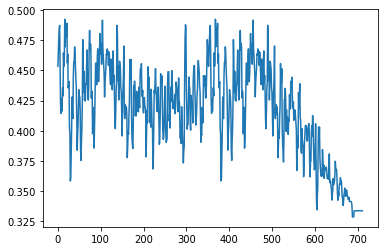

In [414]:
plt.plot(s)

In [360]:
wg = [scale(i-(len(g)//2), z, len(g)) for i,z in enumerate(g)]

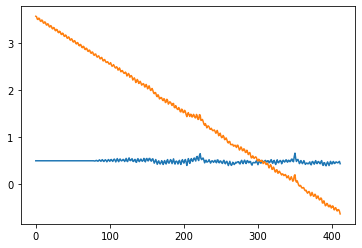

In [361]:
plt.plot(g)
plt.plot(wg)

In [409]:
def scale(i, x, l):
    return (i^2)

In [410]:
ex = [scale(i-50, z, 100) for i,z in enumerate(np.ones(100))]

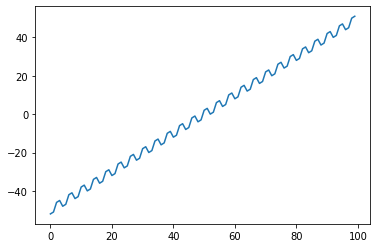

In [411]:
plt.plot(ex)